In [1]:
!pip install -q scikit-learn xgboost tensorflow


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [3]:
from google.colab import files
uploaded = files.upload()


Saving archive (4).zip to archive (4).zip


In [6]:
import pandas as pd
import zipfile

# Open the ZIP file
zip_path = 'archive (4).zip'
with zipfile.ZipFile(zip_path) as z:
    # List files inside the ZIP
    print(z.namelist())  # you will see: ['Cell_Lines_Details.xlsx', 'Compounds-annotation.csv', 'GDSC2-dataset.csv', 'GDSC_DATASET.csv']

    # Read the main dataset CSV (for example: 'GDSC2-dataset.csv')
    with z.open('GDSC2-dataset.csv') as f:
        df = pd.read_csv(f)

# Check the dataframe
df.head()


['Cell_Lines_Details.xlsx', 'Compounds-annotation.csv', 'GDSC2-dataset.csv', 'GDSC_DATASET.csv']


,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC2,343,15946310,683667,PFSK-1,SIDM01132,MB,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-1.463887,0.930220,0.089052,0.433123
1,GDSC2,343,15946548,684052,A673,SIDM00848,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-4.869455,0.614970,0.111351,-1.421100
2,GDSC2,343,15946830,684057,ES5,SIDM00263,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.360586,0.791072,0.142855,-0.599569
3,GDSC2,343,15947087,684059,ES7,SIDM00269,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-5.044940,0.592660,0.135539,-1.516647
4,GDSC2,343,15947369,684062,EW-11,SIDM00203,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.741991,0.734047,0.128059,-0.807232


In [7]:
from zipfile import ZipFile

zip_path = 'archive (4).zip'
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('GDSC_dataset')  # extracts all files to folder 'GDSC_dataset'

# Read the CSV you want
df = pd.read_csv('GDSC_dataset/GDSC2-dataset.csv')
df.head()


,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC2,343,15946310,683667,PFSK-1,SIDM01132,MB,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-1.463887,0.930220,0.089052,0.433123
1,GDSC2,343,15946548,684052,A673,SIDM00848,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-4.869455,0.614970,0.111351,-1.421100
2,GDSC2,343,15946830,684057,ES5,SIDM00263,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.360586,0.791072,0.142855,-0.599569
3,GDSC2,343,15947087,684059,ES7,SIDM00269,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-5.044940,0.592660,0.135539,-1.516647
4,GDSC2,343,15947369,684062,EW-11,SIDM00203,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.741991,0.734047,0.128059,-0.807232


In [8]:
# Quick overview
print(df.shape)
print(df.columns)
df.head()


(242036, 19)
Index(['DATASET', 'NLME_RESULT_ID', 'NLME_CURVE_ID', 'COSMIC_ID',
       'CELL_LINE_NAME', 'SANGER_MODEL_ID', 'TCGA_DESC', 'DRUG_ID',
       'DRUG_NAME', 'PUTATIVE_TARGET', 'PATHWAY_NAME', 'COMPANY_ID',
       'WEBRELEASE', 'MIN_CONC', 'MAX_CONC', 'LN_IC50', 'AUC', 'RMSE',
       'Z_SCORE'],
      dtype='object')


,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC2,343,15946310,683667,PFSK-1,SIDM01132,MB,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-1.463887,0.930220,0.089052,0.433123
1,GDSC2,343,15946548,684052,A673,SIDM00848,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-4.869455,0.614970,0.111351,-1.421100
2,GDSC2,343,15946830,684057,ES5,SIDM00263,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.360586,0.791072,0.142855,-0.599569
3,GDSC2,343,15947087,684059,ES7,SIDM00269,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-5.044940,0.592660,0.135539,-1.516647
4,GDSC2,343,15947369,684062,EW-11,SIDM00203,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.741991,0.734047,0.128059,-0.807232


In [10]:
# Select numeric features
numeric_features = ['MIN_CONC', 'MAX_CONC', 'AUC', 'RMSE', 'Z_SCORE']

# Optional: encode categorical features (e.g., Drug, Cell line)
categorical_features = ['DRUG_NAME', 'CELL_LINE_NAME', 'TCGA_DESC', 'PUTATIVE_TARGET']

# One-hot encode categorical features
X_cat = pd.get_dummies(df[categorical_features], drop_first=True)

# Combine numeric + categorical
X = pd.concat([df[numeric_features], X_cat], axis=1)

# Target variable
y = df['LN_IC50']


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model - MSE: {mse_xgb:.4f}, R²: {r2_xgb:.4f}")


XGBoost Model - MSE: 0.1426, R²: 0.9814


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the DNN model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Regression output
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Predict
y_pred_nn = nn_model.predict(X_test_scaled).flatten()

# Evaluate
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network Model - MSE: {mse_nn:.4f}, R²: {r2_nn:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - loss: 0.9668 - val_loss: 0.1242
Epoch 2/50
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - loss: 0.0973 - val_loss: 0.0746
Epoch 3/50
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - loss: 0.0614 - val_loss: 0.0592
Epoch 4/50
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - loss: 0.0469 - val_loss: 0.0525
Epoch 5/50
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - loss: 0.0370 - val_loss: 0.0501
Epoch 6/50
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 0.0321 - val_loss: 0.0446
Epoch 7/50
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 36s 7ms/step - loss: 0.0279 - val_loss: 0.0454
Epoch 8/50
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 0.0255 - val_loss: 0.0425
Epoch 9/50
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - loss: 0.0236 - val_loss: 0.0385
Epoch 10/50
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - loss: 0.0209 - val_loss: 0.0405
Epoch 11/50
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 36s 8ms/step - loss: 0.0201 - val_loss: 0.0389
Epoch 12/50
4841/48

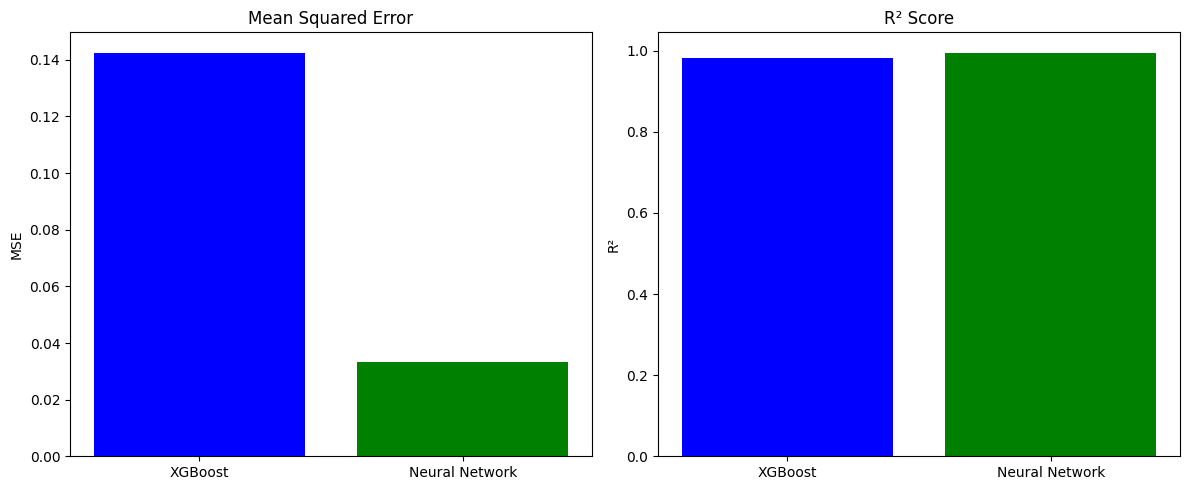

In [14]:
import matplotlib.pyplot as plt

models = ['XGBoost', 'Neural Network']
mse_values = [mse_xgb, mse_nn]
r2_values = [r2_xgb, r2_nn]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# MSE
ax[0].bar(models, mse_values, color=['blue', 'green'])
ax[0].set_title('Mean Squared Error')
ax[0].set_ylabel('MSE')

# R²
ax[1].bar(models, r2_values, color=['blue', 'green'])
ax[1].set_title('R² Score')
ax[1].set_ylabel('R²')

plt.tight_layout()
plt.show()


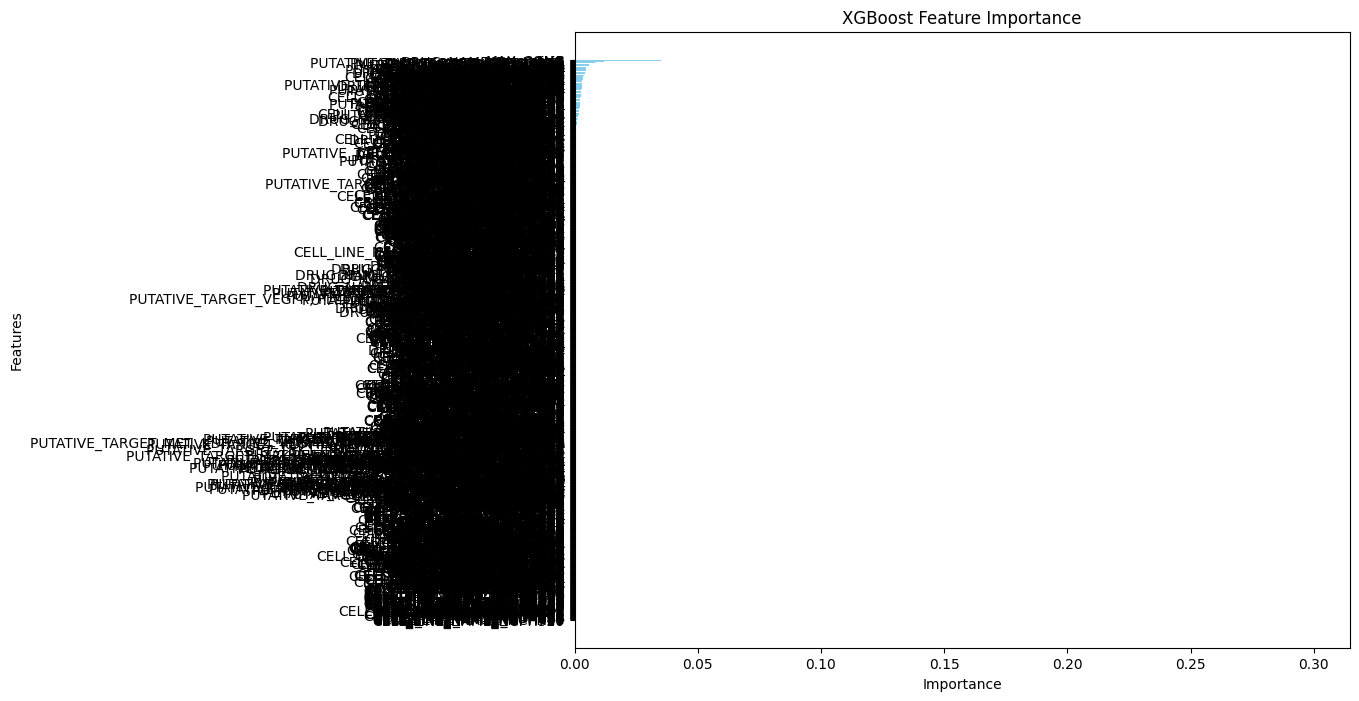

In [15]:
import matplotlib.pyplot as plt

# Get feature importance from XGBoost
importance = xgb_model.feature_importances_
features = X.columns

# Sort features by importance
sorted_idx = importance.argsort()

plt.figure(figsize=(10,8))
plt.barh(features[sorted_idx], importance[sorted_idx], color='skyblue')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


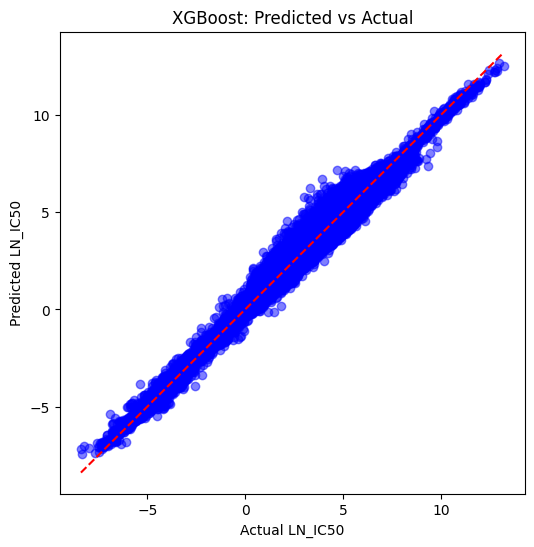

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel('Actual LN_IC50')
plt.ylabel('Predicted LN_IC50')
plt.title('XGBoost: Predicted vs Actual')
plt.show()


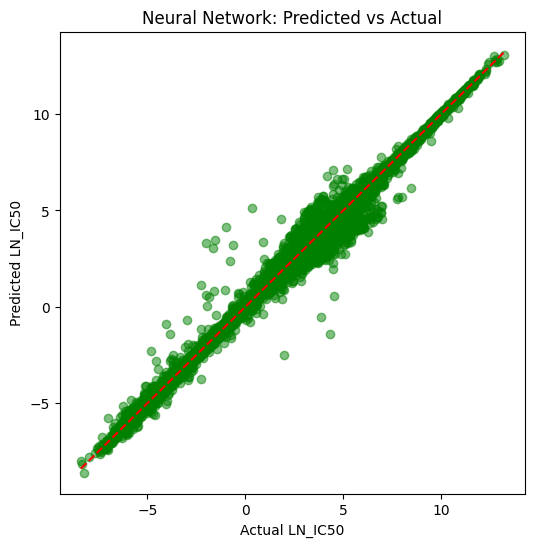

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_nn, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel('Actual LN_IC50')
plt.ylabel('Predicted LN_IC50')
plt.title('Neural Network: Predicted vs Actual')
plt.show()


In [18]:
# Encode additional categorical features
additional_cat = ['PATHWAY_NAME', 'COMPANY_ID', 'WEBRELEASE']
X_additional = pd.get_dummies(df[additional_cat], drop_first=True)

# Combine with existing features
X = pd.concat([df[numeric_features], X_cat, X_additional], axis=1)


In [20]:
X['MIN_MAX'] = df['MIN_CONC'] * df['MAX_CONC']
X['AUC_RMSE'] = df['AUC'] / (df['RMSE'] + 1e-6)  # prevent division by zero
X['MIN_Z'] = df['MIN_CONC'] * df['Z_SCORE']



In [21]:
X['LN_MIN'] = np.log(df['MIN_CONC'] + 1e-6)
X['LN_MAX'] = np.log(df['MAX_CONC'] + 1e-6)
X['AUC_squared'] = df['AUC']**2
X['RMSE_squared'] = df['RMSE']**2


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,  # more trees for higher-dimensional data
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model - MSE: {mse_xgb:.4f}, R²: {r2_xgb:.4f}")


XGBoost Model - MSE: 0.1015, R²: 0.9868


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the DNN model
nn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)  # Regression output
])

# Compile
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train
history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# Predictions
y_pred_nn = nn_model.predict(X_test_scaled).flatten()

# Evaluate
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network Model - MSE: {mse_nn:.4f}, R²: {r2_nn:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2421/2421 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - loss: 1.2904 - val_loss: 0.4636
Epoch 2/100
2421/2421 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - loss: 0.1719 - val_loss: 0.3547
Epoch 3/100
2421/2421 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - loss: 0.1160 - val_loss: 0.4154
Epoch 4/100
2421/2421 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - loss: 0.0931 - val_loss: 0.2695
Epoch 5/100
2421/2421 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - loss: 0.0817 - val_loss: 0.3872
Epoch 6/100
2421/2421 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - loss: 0.0742 - val_loss: 0.2875
Epoch 7/100
2421/2421 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - loss: 0.0688 - val_loss: 0.3116
Epoch 8/100
2421/2421 ━━━━━━━━━━━━━━━━━━━━ 34s 14ms/step - loss: 0.0643 - val_loss: 0.3872
Epoch 9/100
2421/2421 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - loss: 0.0618 - val_loss: 0.3000
Epoch 10/100
2421/2421 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - loss: 0.0574 - val_loss: 0.3671
Epoch 11/100
2421/2421 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - loss: 0.0540 - val_loss: 0.28

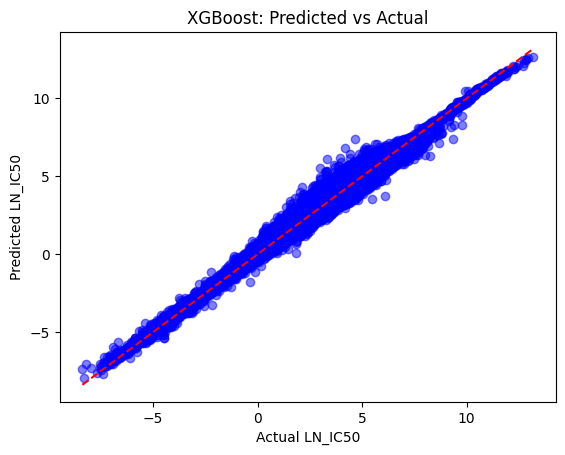

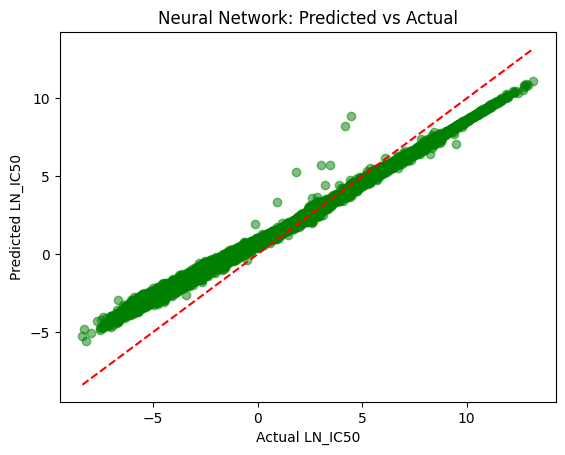

In [25]:
# XGBoost
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual LN_IC50')
plt.ylabel('Predicted LN_IC50')
plt.title('XGBoost: Predicted vs Actual')
plt.show()

# Neural Network
plt.scatter(y_test, y_pred_nn, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual LN_IC50')
plt.ylabel('Predicted LN_IC50')
plt.title('Neural Network: Predicted vs Actual')
plt.show()


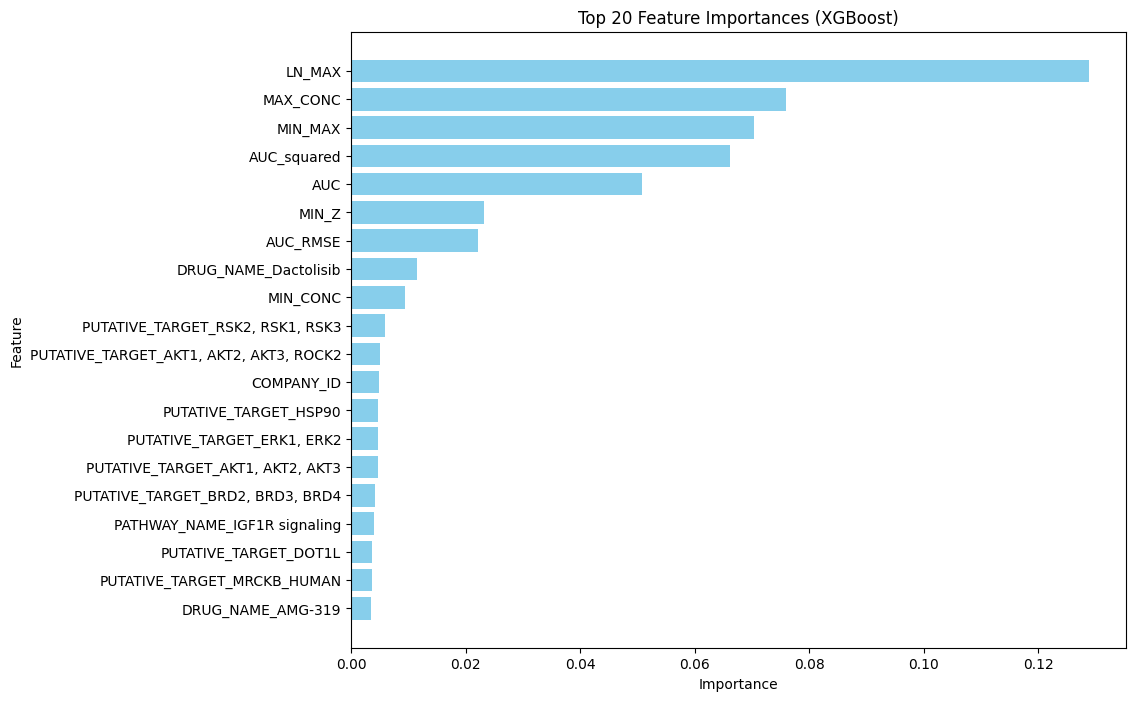

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importance = xgb_model.feature_importances_
features = X.columns
sorted_idx = np.argsort(importance)

plt.figure(figsize=(10,8))
plt.barh(features[sorted_idx][-20:], importance[sorted_idx][-20:], color='skyblue')  # top 20 features
plt.title('Top 20 Feature Importances (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


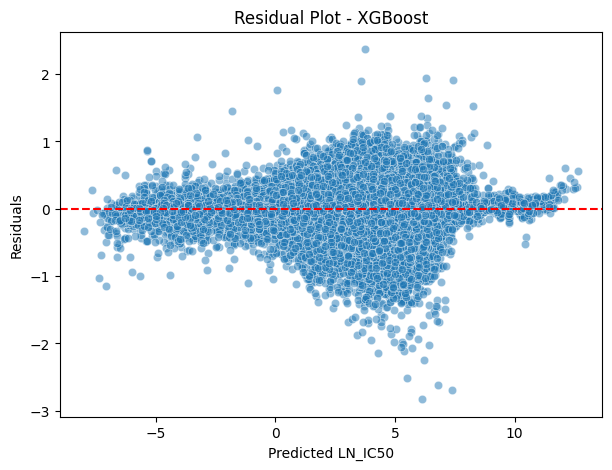

In [27]:
import seaborn as sns

residuals_xgb = y_test - y_pred_xgb

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred_xgb, y=residuals_xgb, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted LN_IC50')
plt.ylabel('Residuals')
plt.title('Residual Plot - XGBoost')
plt.show()


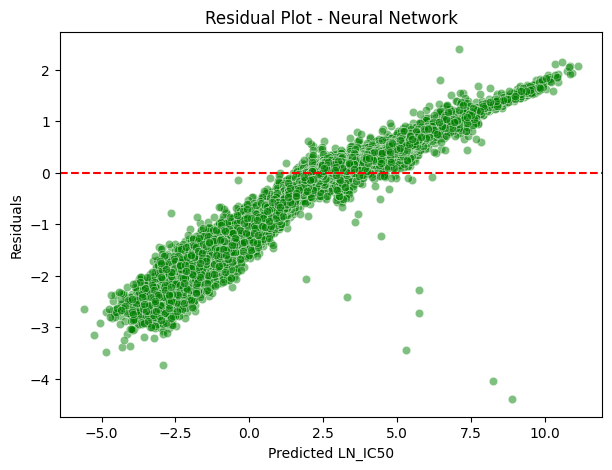

In [28]:
residuals_nn = y_test - y_pred_nn

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred_nn, y=residuals_nn, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted LN_IC50')
plt.ylabel('Residuals')
plt.title('Residual Plot - Neural Network')
plt.show()


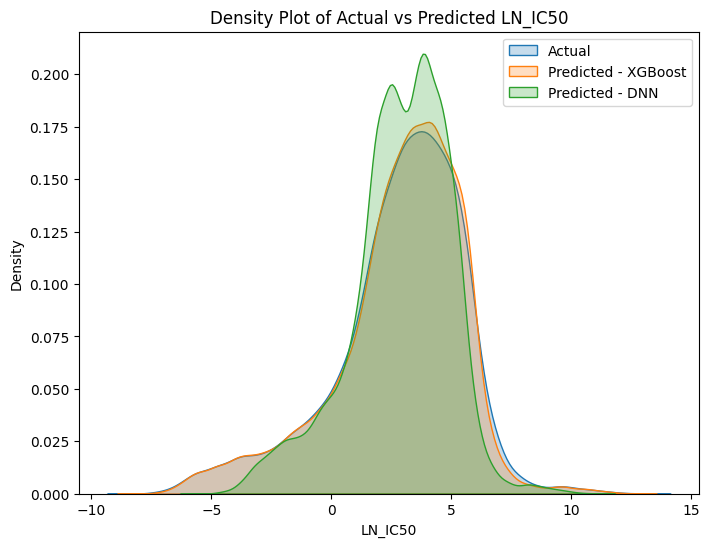

In [29]:
plt.figure(figsize=(8,6))
sns.kdeplot(y_test, label='Actual', fill=True)
sns.kdeplot(y_pred_xgb, label='Predicted - XGBoost', fill=True)
sns.kdeplot(y_pred_nn, label='Predicted - DNN', fill=True)
plt.title('Density Plot of Actual vs Predicted LN_IC50')
plt.xlabel('LN_IC50')
plt.ylabel('Density')
plt.legend()
plt.show()


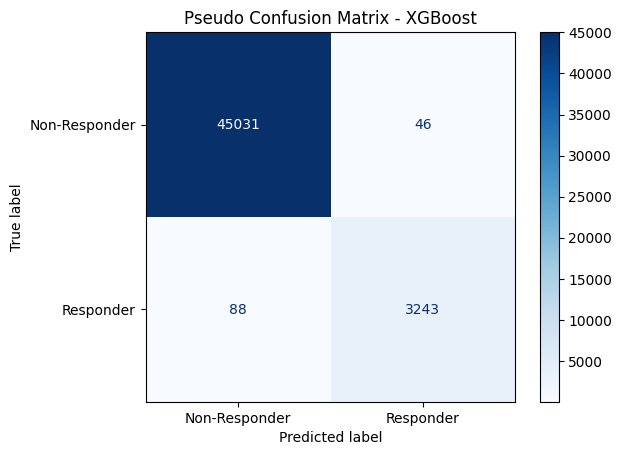

In [30]:
# Example: classify as Responder if LN_IC50 < -2, Non-responder if >= -2
y_test_cat = np.where(y_test < -2, 1, 0)
y_pred_xgb_cat = np.where(y_pred_xgb < -2, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_cat, y_pred_xgb_cat)
disp = ConfusionMatrixDisplay(cm, display_labels=['Non-Responder','Responder'])
disp.plot(cmap='Blues')
plt.title('Pseudo Confusion Matrix - XGBoost')
plt.show()


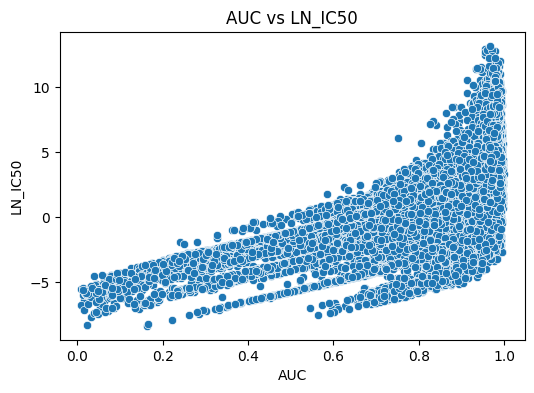

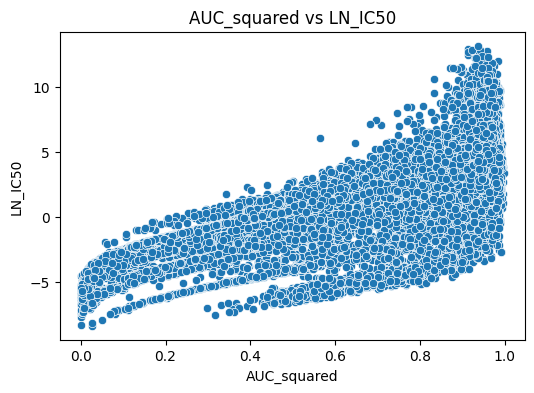

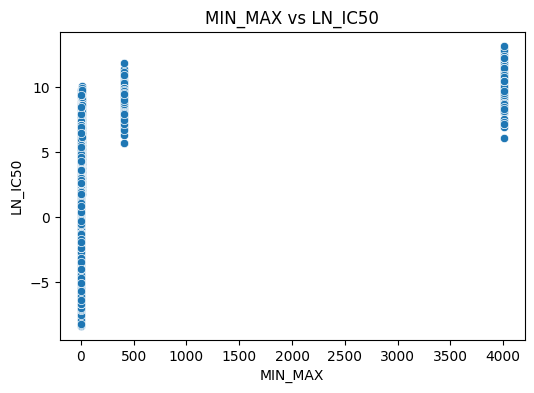

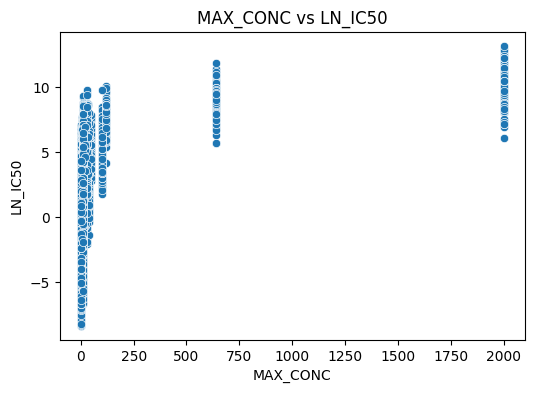

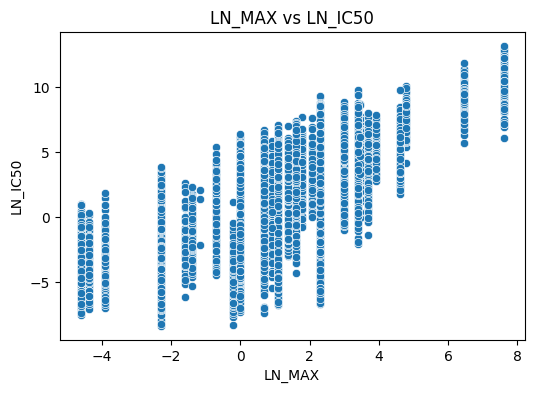

In [31]:
top_features = features[sorted_idx][-5:]  # top 5 features
for f in top_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X_test[f], y=y_test)
    plt.xlabel(f)
    plt.ylabel('LN_IC50')
    plt.title(f'{f} vs LN_IC50')
    plt.show()


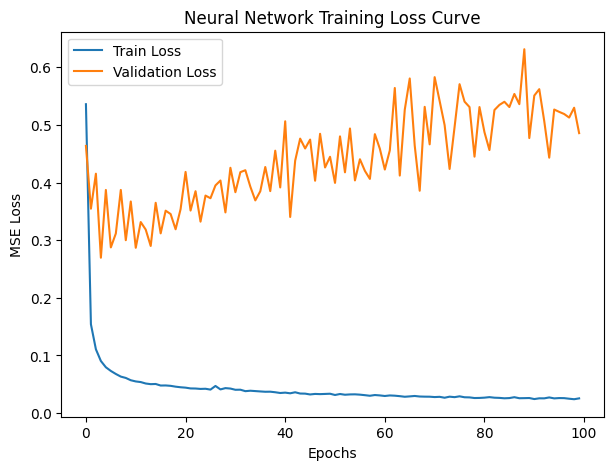

In [32]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Neural Network Training Loss Curve')
plt.legend()
plt.show()


In [33]:
import numpy as np
import pandas as pd

def predict_drug_response(new_data, model, scaler, threshold=-2):
    """
    new_data : pd.DataFrame with same features as training X
    model    : trained model (XGBoost or DNN)
    scaler   : StandardScaler fitted on training data
    threshold: LN_IC50 threshold to classify responder/non-responder
    """

    # Scale numeric features
    new_scaled = scaler.transform(new_data)

    # Predict LN_IC50
    pred_ln_ic50 = model.predict(new_scaled)

    # Optional: classify as Responder / Non-Responder
    pred_class = np.where(pred_ln_ic50 < threshold, 'Responder', 'Non-Responder')

    return pred_ln_ic50, pred_class


In [34]:
# Example single input
new_sample = pd.DataFrame({
    'MIN_CONC': [0.0001],
    'MAX_CONC': [0.1],
    'AUC': [0.8],
    'RMSE': [0.1],
    'Z_SCORE': [0.4],
    'MIN_MAX': [0.00001],
    'AUC_RMSE': [8.0],
    'MIN_Z': [0.00004],
    'LN_MIN': [np.log(0.0001)],
    'LN_MAX': [np.log(0.1)],
    'AUC_squared': [0.64],
    'RMSE_squared': [0.01],
    # include all one-hot encoded categorical columns as in training X
    # Example: 'DRUG_NAME_Camptothecin':1, 'CELL_LINE_NAME_PFSK-1':1, etc.
})


In [35]:
new_sample_encoded = pd.get_dummies(new_sample)
new_sample_encoded = new_sample_encoded.reindex(columns=X.columns, fill_value=0)


In [36]:
ln_ic50_pred, class_pred = predict_drug_response(new_sample_encoded, xgb_model, scaler)
print("Predicted LN_IC50:", ln_ic50_pred)
print("Predicted Class:", class_pred)


Predicted LN_IC50: [-2.6040049]
Predicted Class: ['Responder']


In [37]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.6 MB/s eta 0:00:00


In [38]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np


In [39]:
# Numeric inputs
min_conc_widget = widgets.FloatText(value=0.0001, description='MIN_CONC:')
max_conc_widget = widgets.FloatText(value=0.1, description='MAX_CONC:')
auc_widget = widgets.FloatText(value=0.8, description='AUC:')
rmse_widget = widgets.FloatText(value=0.1, description='RMSE:')
zscore_widget = widgets.FloatText(value=0.4, description='Z_SCORE:')

# Categorical inputs (dropdowns with example values from your dataset)
drug_widget = widgets.Dropdown(
    options=['Camptothecin', 'Drug2', 'Drug3'],  # fill with actual drug names
    value='Camptothecin',
    description='DRUG_NAME:'
)
cell_line_widget = widgets.Dropdown(
    options=['PFSK-1', 'A673', 'ES5'],  # fill with actual cell lines
    value='PFSK-1',
    description='CELL_LINE:'
)
tcga_widget = widgets.Dropdown(
    options=['MB', 'UNCLASSIFIED'],  # fill with actual TCGA_DESC
    value='MB',
    description='TCGA_DESC:'
)
putative_widget = widgets.Dropdown(
    options=['TOP1', 'TARGET2'],  # fill with actual PUTATIVE_TARGET
    value='TOP1',
    description='PUTATIVE_TARGET:'
)


In [40]:
def interactive_predict(
    min_conc, max_conc, auc, rmse, zscore,
    drug_name, cell_line, tcga_desc, putative_target
):
    # Create dataframe for new input
    new_sample = pd.DataFrame({
        'MIN_CONC':[min_conc],
        'MAX_CONC':[max_conc],
        'AUC':[auc],
        'RMSE':[rmse],
        'Z_SCORE':[zscore],
        'MIN_MAX':[min_conc*max_conc],
        'AUC_RMSE':[auc/(rmse+1e-6)],
        'MIN_Z':[min_conc*zscore],
        'LN_MIN':[np.log(min_conc+1e-6)],
        'LN_MAX':[np.log(max_conc+1e-6)],
        'AUC_squared':[auc**2],
        'RMSE_squared':[rmse**2],
        # Categorical columns (one-hot encoding)
        f'DRUG_NAME_{drug_name}': [1],
        f'CELL_LINE_NAME_{cell_line}': [1],
        f'TCGA_DESC_{tcga_desc}': [1],
        f'PUTATIVE_TARGET_{putative_target}': [1]
    })

    # Align with training columns
    new_sample_encoded = new_sample.reindex(columns=X.columns, fill_value=0)

    # Scale features
    new_scaled = scaler.transform(new_sample_encoded)

    # Predict
    ln_ic50_pred = xgb_model.predict(new_scaled)
    class_pred = 'Responder' if ln_ic50_pred < -2 else 'Non-Responder'

    print("Predicted LN_IC50:", ln_ic50_pred[0])
    print("Predicted Class:", class_pred)


In [42]:
widgets.interact(
    interactive_predict,
    min_conc=min_conc_widget,
    max_conc=max_conc_widget,
    auc=auc_widget,
    rmse=rmse_widget,
    zscore=zscore_widget,
    drug_name=drug_widget,
    cell_line=cell_line_widget,
    tcga_desc=tcga_widget,
    putative_target=putative_widget
)


interactive(children=(FloatText(value=3.0001, description='MIN_CONC:'), FloatText(value=0.1, description='MAX_…

<function __main__.interactive_predict(min_conc, max_conc, auc, rmse, zscore, drug_name, cell_line, tcga_desc, putative_target)>

In [47]:
!pip install gradio


In [48]:
import gradio as gr

def predict_drug(min_conc, max_conc, auc, rmse, zscore, drug, cell_line, tcga, target):
    # Create input dataframe, encode features, scale as before
    new_sample = pd.DataFrame({
        'MIN_CONC':[min_conc],
        'MAX_CONC':[max_conc],
        'AUC':[auc],
        'RMSE':[rmse],
        'Z_SCORE':[zscore],
        'MIN_MAX':[min_conc*max_conc],
        'AUC_RMSE':[auc/(rmse+1e-6)],
        'MIN_Z':[min_conc*zscore],
        'LN_MIN':[np.log(min_conc+1e-6)],
        'LN_MAX':[np.log(max_conc+1e-6)],
        'AUC_squared':[auc**2],
        'RMSE_squared':[rmse**2],
        f'DRUG_NAME_{drug}':[1],
        f'CELL_LINE_NAME_{cell_line}':[1],
        f'TCGA_DESC_{tcga}':[1],
        f'PUTATIVE_TARGET_{target}':[1]
    })
    new_sample = new_sample.reindex(columns=X.columns, fill_value=0)
    new_scaled = scaler.transform(new_sample)

    ln_ic50_pred = xgb_model.predict(new_scaled)[0]
    pred_class = 'Responder' if ln_ic50_pred < -2 else 'Non-Responder'
    return f"Predicted LN_IC50: {ln_ic50_pred:.4f}", f"Predicted Class: {pred_class}"

# Gradio interface
iface = gr.Interface(
    fn=predict_drug,
    inputs=[
        gr.Number(label="MIN_CONC"),
        gr.Number(label="MAX_CONC"),
        gr.Number(label="AUC"),
        gr.Number(label="RMSE"),
        gr.Number(label="Z_SCORE"),
        gr.Dropdown(['Camptothecin','Drug2','Drug3'], label="Drug Name"),
        gr.Dropdown(['PFSK-1','A673','ES5'], label="Cell Line"),
        gr.Dropdown(['MB','UNCLASSIFIED'], label="TCGA_DESC"),
        gr.Dropdown(['TOP1','TARGET2'], label="Putative Target")
    ],
    outputs=[gr.Textbox(label="LN_IC50 Prediction"), gr.Textbox(label="Class Prediction")],
    live=True
)

iface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fe242ba3a42afb197c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [50]:
from google.colab import files

uploaded = files.upload()  # A dialog will open to select files


Saving archive (4).zip to archive (4) (1).zip


In [51]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
import joblib

# X, y = your processed features and target (LN_IC50)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost
xgb_model = XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Save model, scaler, and columns
joblib.dump(xgb_model, 'xgb_drug_response_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns, 'X_columns.pkl')


['X_columns.pkl']

In [52]:
import zipfile

# Replace 'your_zip_file.zip' with the actual filename you uploaded
zip_path = 'archive (4).zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')


In [53]:
import os
os.listdir('/content/')


['.config',
 'GDSC2-dataset.csv',
 'GDSC_dataset',
 'X_columns.pkl',
 'xgb_drug_response_model.pkl',
 'archive (4) (1).zip',
 'GDSC_DATASET.csv',
 'archive (4).zip',
 'Compounds-annotation.csv',
 '.gradio',
 'Cell_Lines_Details.xlsx',
 'scaler.pkl',
 'sample_data']

In [54]:
# -----------------------------
# Step 1: Load the model, scaler, and columns
# -----------------------------
import joblib

xgb_model = joblib.load("/content/xgb_drug_response_model.pkl")
scaler = joblib.load("/content/scaler.pkl")
X_columns = joblib.load("/content/X_columns.pkl")

print("All files loaded successfully!")

# -----------------------------
# Step 2: Import other libraries
# -----------------------------
import gradio as gr
import pandas as pd
import numpy as np

# -----------------------------
# Step 3: Prediction function (hospital-friendly, no emojis)
# -----------------------------
def predict_drug_response(min_conc, max_conc, auc, rmse, zscore, drug, cell_line, tcga, target):

    # Create input DataFrame
    new_sample = pd.DataFrame({
        'MIN_CONC':[min_conc],
        'MAX_CONC':[max_conc],
        'AUC':[auc],
        'RMSE':[rmse],
        'Z_SCORE':[zscore],
        'MIN_MAX':[min_conc*max_conc],
        'AUC_RMSE':[auc/(rmse+1e-6)],
        'MIN_Z':[min_conc*zscore],
        'LN_MIN':[np.log(min_conc+1e-6)],
        'LN_MAX':[np.log(max_conc+1e-6)],
        'AUC_squared':[auc**2],
        'RMSE_squared':[rmse**2],
        f'DRUG_NAME_{drug}':[1],
        f'CELL_LINE_NAME_{cell_line}':[1],
        f'TCGA_DESC_{tcga}':[1],
        f'PUTATIVE_TARGET_{target}':[1]
    })

    # Align with training columns
    new_sample = new_sample.reindex(columns=X_columns, fill_value=0)

    # Scale features
    new_scaled = scaler.transform(new_sample)

    # Predict LN_IC50
    ln_ic50_pred = xgb_model.predict(new_scaled)[0]

    # Convert prediction to plain language
    if ln_ic50_pred < -3:
        effectiveness = "Very High"
        message = f"The patient's cells are very likely to respond well to {drug}."
    elif ln_ic50_pred < -2:
        effectiveness = "High"
        message = f"The patient's cells are likely to respond well to {drug}."
    elif ln_ic50_pred < -1:
        effectiveness = "Moderate"
        message = f"The patient's cells may respond moderately to {drug}."
    else:
        effectiveness = "Low"
        message = f"The patient's cells are unlikely to respond to {drug}."

    recommendation = "Recommendation: Monitor response after first dose and adjust treatment accordingly."

    return message, f"Effectiveness Level: {effectiveness}", recommendation

# -----------------------------
# Step 4: Gradio interface
# -----------------------------
drug_list = ['Camptothecin','Drug2','Drug3']
cell_line_list = ['PFSK-1','A673','ES5']
tcga_list = ['MB','UNCLASSIFIED']
target_list = ['TOP1','TARGET2']

iface = gr.Interface(
    fn=predict_drug_response,
    inputs=[
        gr.Number(label="MIN_CONC", value=0.0001, precision=6),
        gr.Number(label="MAX_CONC", value=0.1, precision=6),
        gr.Number(label="AUC", value=0.8, precision=3),
        gr.Number(label="RMSE", value=0.1, precision=3),
        gr.Number(label="Z_SCORE", value=0.4, precision=3),
        gr.Dropdown(drug_list, label="Drug Name"),
        gr.Dropdown(cell_line_list, label="Cell Line"),
        gr.Dropdown(tcga_list, label="TCGA_DESC"),
        gr.Dropdown(target_list, label="Putative Target")
    ],
    outputs=[
        gr.Textbox(label="Drug Response"),
        gr.Textbox(label="Effectiveness Level"),
        gr.Textbox(label="Recommendation")
    ],
    live=True,
    title="Hospital-Grade Drug Response Predictor",
    description="Enter drug and cell line details. The model predicts likelihood of response and gives a simple recommendation."
)

# -----------------------------
# Step 5: Launch dashboard
# -----------------------------
iface.launch()


All files loaded successfully!
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://77993ac2589ff05c36.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [4]:
!pip install xgboost gradio joblib pandas scikit-learn reportlab
import os, zipfile, joblib, pandas as pd


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.7 MB/s eta 0:00:00


In [5]:
from google.colab import files

uploaded = files.upload()  # upload your zip file
zip_name = list(uploaded.keys())[0]

# Extract ZIP
with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall("/content/GDSC_data")

print(" Dataset extracted successfully!")
!ls /content/GDSC_data


Saving archive (4).zip to archive (4).zip
 Dataset extracted successfully!
Cell_Lines_Details.xlsx   GDSC2-dataset.csv
Compounds-annotation.csv  GDSC_DATASET.csv


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

df = pd.read_csv("/content/GDSC_data/GDSC2-dataset.csv")
print("Shape:", df.shape)
df = df.dropna(subset=['LN_IC50'])

# Select and encode features
features = ['MIN_CONC', 'MAX_CONC', 'AUC', 'RMSE', 'Z_SCORE']
df = pd.get_dummies(df, columns=['PUTATIVE_TARGET', 'PATHWAY_NAME'], drop_first=True)

X = df[features + [c for c in df.columns if 'PUTATIVE_TARGET_' in c or 'PATHWAY_NAME_' in c]]
y = df['LN_IC50']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale and train model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train_scaled, y_train)

# Save trained files
joblib.dump(model, "xgb_drug_response_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns, "X_columns.pkl")

print("Model trained & saved successfully!")


Shape: (242036, 19)
Model trained & saved successfully!


In [7]:
import gradio as gr
import numpy as np
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# Load components
xgb_model = joblib.load("xgb_drug_response_model.pkl")
scaler = joblib.load("scaler.pkl")
X_columns = joblib.load("X_columns.pkl")

def predict_drug_response(min_conc, max_conc, auc, rmse, z_score):
    input_data = pd.DataFrame([[min_conc, max_conc, auc, rmse, z_score]],
                              columns=['MIN_CONC', 'MAX_CONC', 'AUC', 'RMSE', 'Z_SCORE'])
    for col in X_columns:
        if col not in input_data.columns:
            input_data[col] = 0

    scaled_input = scaler.transform(input_data[X_columns])
    pred_ln_ic50 = xgb_model.predict(scaled_input)[0]

    # Classification logic
    if pred_ln_ic50 < -3:
        response = "Excellent Responder"
        risk = "Low"
    elif -3 <= pred_ln_ic50 < -1:
        response = "Moderate Responder"
        risk = "Medium"
    else:
        response = "Poor Responder"
        risk = "High"

    # Generate PDF report
    pdf_path = "/content/Drug_Response_Report.pdf"
    c = canvas.Canvas(pdf_path, pagesize=letter)
    c.setFont("Helvetica-Bold", 16)
    c.drawString(200, 760, "Drug Response Prediction Report")
    c.setFont("Helvetica", 12)
    c.drawString(100, 710, f"Predicted LN_IC50: {pred_ln_ic50:.2f}")
    c.drawString(100, 690, f"Response Category: {response}")
    c.drawString(100, 670, f"Estimated Risk Level: {risk}")
    c.drawString(100, 630, "Interpretation:")
    c.setFont("Helvetica-Oblique", 11)
    if risk == "Low":
        c.drawString(120, 610, "Patient likely to respond positively to the drug.")
    elif risk == "Medium":
        c.drawString(120, 610, "Moderate response expected — dosage optimization may help.")
    else:
        c.drawString(120, 610, "Poor response expected — consider alternative treatment.")
    c.save()

    return (
        f"Predicted LN_IC50: {pred_ln_ic50:.2f}\n"
        f"Response Category: {response}\n"
        f"Estimated Risk Level: {risk}",
        pdf_path
    )

with gr.Blocks(theme=gr.themes.Soft()) as dashboard:
    gr.Markdown("<h1 style='text-align:center;'>🏥 IntelliCure: Drug Response Prediction System</h1>")
    gr.Markdown("Enter patient and lab parameters below:")

    with gr.Row():
        min_conc = gr.Number(label="Minimum Concentration (µM)")
        max_conc = gr.Number(label="Maximum Concentration (µM)")
        auc = gr.Number(label="AUC (Area Under Curve)")
        rmse = gr.Number(label="RMSE Value")
        z_score = gr.Number(label="Z-Score")

    predict_btn = gr.Button("Predict Drug Response")
    output_text = gr.Textbox(label="Prediction Summary")
    download_link = gr.File(label="Download Report (PDF)")

    predict_btn.click(predict_drug_response,
                      inputs=[min_conc, max_conc, auc, rmse, z_score],
                      outputs=[output_text, download_link])

dashboard.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4755a30b66f2f5c187.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [8]:
# ============================
# LuminaX — Colab-ready Dashboard
# Copy & paste into one cell in Google Colab and run
# ============================

# 0) Install dependencies (first time)
!pip install -q gradio pandas numpy plotly xgboost joblib scikit-learn reportlab

# 1) Imports
import os, zipfile, joblib, io
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import gradio as gr
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import plotly.express as px
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 2) Paths and helper functions
MODEL_FNAME = "/content/xgb_drug_response_model.pkl"
SCALER_FNAME = "/content/scaler.pkl"
COLS_FNAME = "/content/X_columns.pkl"

def files_present():
    return all(os.path.exists(p) for p in [MODEL_FNAME, SCALER_FNAME, COLS_FNAME])

# 3) Utility: extract uploaded zip into /content/LuminaX_data
def extract_uploaded_zip(zip_bytes, dest="/content/LuminaX_data"):
    if not os.path.exists(dest):
        os.makedirs(dest)
    z = zipfile.ZipFile(io.BytesIO(zip_bytes))
    z.extractall(dest)
    return dest

# 4) Preprocessing helper used for training and feature building
def build_feature_df_from_raw(df_raw):
    # Keep required numeric columns if present, else fill zeros
    # We'll create the core numeric features needed by model:
    # ['MIN_CONC','MAX_CONC','AUC','RMSE','Z_SCORE'] plus encoded categoricals.
    df = df_raw.copy()
    df = df.rename(columns=lambda s: s.strip())
    # Ensure numeric columns exist or fill default values
    for c in ['MIN_CONC','MAX_CONC','AUC','RMSE','Z_SCORE']:
        if c not in df.columns:
            df[c] = 0.0
    # One-hot encode some categorical fields commonly present
    cat_cols = []
    for c in ['DRUG_NAME','CELL_LINE_NAME','TCGA_DESC','PUTATIVE_TARGET','PATHWAY_NAME']:
        if c in df.columns:
            cat_cols.append(c)
    if len(cat_cols)>0:
        df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    return df

# 5) Train model if artifacts missing and dataset available under /content/LuminaX_data
def train_model_if_needed(data_dir="/content/LuminaX_data"):
    # If model already exists, just load
    if files_present():
        print("Model artifacts already present. Skipping training.")
        return True
    # Find CSV inside data_dir
    if not os.path.exists(data_dir):
        print("No data directory found — upload dataset zip when prompted to train model.")
        return False
    # look for candidate csvs
    candidates = []
    for root,_,files in os.walk(data_dir):
        for f in files:
            if f.lower().endswith(".csv"):
                candidates.append(os.path.join(root,f))
    if len(candidates)==0:
        print("No CSV dataset found in extracted ZIP. Please upload a zip that contains GDSC CSV.")
        return False
    # pick the first likely candidate (prefer GDSC2-dataset.csv)
    chosen = None
    for c in candidates:
        if "GDSC2-dataset" in os.path.basename(c) or "GDSC_DATASET" in os.path.basename(c):
            chosen = c
            break
    if chosen is None:
        chosen = candidates[0]
    print("Using dataset:", chosen)
    raw = pd.read_csv(chosen, low_memory=False)
    if 'LN_IC50' not in raw.columns:
        # try to find alternative target names
        print("Dataset missing LN_IC50 column. Cannot train automatically.")
        return False
    # Preprocess and build features
    df_full = build_feature_df_from_raw(raw)
    df_full = df_full.fillna(0)
    # target
    y = df_full['LN_IC50'].values
    # feature columns: numeric ones + any automatically created dummies except target
    drop_cols = ['LN_IC50']
    X = df_full.drop(columns=[c for c in drop_cols if c in df_full.columns])
    # Quick train-test split
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    except Exception as e:
        print("Error splitting dataset:", e); return False
    # scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # train XGBoost
    model = XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.05, random_state=42, verbosity=0)
    model.fit(X_train_scaled, y_train)
    # eval
    y_pred = model.predict(X_test_scaled)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Training finished — test RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")
    # save artifacts
    joblib.dump(model, MODEL_FNAME)
    joblib.dump(scaler, SCALER_FNAME)
    joblib.dump(list(X.columns), COLS_FNAME)
    print("Saved model artifacts to /content/")
    return True

# 6) Mapping of clinician inputs to model's numeric features
# This is a simple, transparent mapping so the UI uses clinical terms:
# - dosage_mg_per_ml -> MIN_CONC, MAX_CONC (scaled)
# - biomarker_value -> AUC proxy and Z_SCORE proxy
# - age and cancer type can modulate features by small factors
def clinical_to_model_features(dosage_mg, biomarker_value, age, cancer_type, drug_name):
    # Heuristic transforms (adjustable)
    # Convert dosage to concentration proxies (MIN_CONC, MAX_CONC)
    # Assume typical dosage range 0.1 - 100 mg => scale down to micro-molar-like proxies
    MIN_CONC = max(dosage_mg * 1e-4, 1e-9)   # small number
    MAX_CONC = max(dosage_mg * 1e-3, MIN_CONC*10)
    # Map biomarker_value (e.g., expression level) to AUC-like proxy (0-1 scale)
    # We normalize biomarker_value assuming typical lab range 0-1000; clamp
    b = float(biomarker_value)
    AUC = max(min(b / 1000.0, 2.0), 0.0)
    # RMSE: we don't have a lab RMSE per patient; use small baseline but vary with age
    RMSE = 0.1 + max((age - 50)/500.0, 0)
    # Z_SCORE: center biomarker around 0 with a crude estimate
    Z_SCORE = (b - 200.0) / (200.0 + abs(b))  # heuristic -1..+1
    return {
        'MIN_CONC': MIN_CONC,
        'MAX_CONC': MAX_CONC,
        'AUC': AUC,
        'RMSE': RMSE,
        'Z_SCORE': Z_SCORE
    }

# 7) Confidence heuristic (distance to training set mean)
def compute_confidence(X_new_array, train_X_array=None):
    try:
        if train_X_array is None:
            return "N/A"
        mean = np.mean(train_X_array, axis=0)
        std = np.std(train_X_array, axis=0) + 1e-9
        z = (X_new_array - mean) / std
        dist = np.linalg.norm(z)
        conf = np.exp(-dist / 10.0)
        return f"{conf*100:.1f}%"
    except Exception:
        return "N/A"

# 8) Safe load (train if necessary)
if not files_present():
    print("Model artifacts not found. Please upload dataset ZIP when prompted; the cell will train the model automatically.")
else:
    print("Found model artifacts. Ready to launch LuminaX.")

# 9) Gradio app pieces
def create_report_pdf(patient_id, patient_name, age, gender, cancer_type, drug, dosage_mg, biomarker_value, interpretation_text, effectiveness, confidence, numeric_ln, notes, out_path="/content/LuminaX_Report.pdf"):
    c = canvas.Canvas(out_path, pagesize=letter)
    width, height = letter
    # Header
    c.setFont("Helvetica-Bold", 18)
    c.drawCentredString(width/2.0, height-50, "LuminaX — Clinical Drug Response Report")
    c.setFont("Helvetica", 10)
    c.drawCentredString(width/2.0, height-65, "Confidential — For clinical use only")
    # Patient details
    c.setFont("Helvetica-Bold", 12)
    c.drawString(50, height-100, f"Patient ID: {patient_id}")
    c.drawString(300, height-100, f"Patient Name: {patient_name}")
    c.setFont("Helvetica", 11)
    c.drawString(50, height-120, f"Age: {age}    Gender: {gender}")
    c.drawString(300, height-120, f"Cancer Type: {cancer_type}")
    # Prediction block
    c.setFont("Helvetica-Bold", 13)
    c.drawString(50, height-160, "Prediction Summary")
    c.setFont("Helvetica", 11)
    c.drawString(60, height-180, f"Drug Evaluated: {drug}")
    c.drawString(60, height-200, f"Dosage (mg): {dosage_mg}")
    c.drawString(60, height-220, f"Predicted Response: {effectiveness}")
    c.drawString(60, height-240, f"Predicted LN_IC50: {numeric_ln:.3f}")
    c.drawString(60, height-260, f"Model Confidence: {confidence}")
    # Interpretation
    c.setFont("Helvetica-Bold", 12)
    c.drawString(50, height-300, "Clinical Interpretation")
    c.setFont("Helvetica", 11)
    text_y = height-320
    for line in interpretation_text.split('\n'):
        c.drawString(60, text_y, line)
        text_y -= 16
    # Notes
    c.setFont("Helvetica-Bold", 12)
    c.drawString(50, text_y-10, "Clinician Notes:")
    c.setFont("Helvetica", 11)
    c.drawString(60, text_y-30, notes if notes else "—")
    # Footer
    c.setFont("Helvetica", 9)
    c.drawString(50, 30, "LuminaX Clinical AI — Generated report")
    c.drawRightString(width-50, 30, "Page 1")
    c.save()
    return out_path

# Load training features for confidence calculation if possible
train_X_cache = None
if os.path.exists("/content/LuminaX_data"):
    # attempt to create train cache if dataset present
    try:
        # pick CSV
        files = []
        for root,_,fs in os.walk("/content/LuminaX_data"):
            for f in fs:
                if f.lower().endswith(".csv"):
                    files.append(os.path.join(root,f))
        if files:
            rawdf = pd.read_csv(files[0], low_memory=False)
            df_feat = build_feature_df_from_raw(rawdf).fillna(0)
            train_X_cache = df_feat.values
    except Exception:
        train_X_cache = None

# Function called by Gradio to do a single clinical-friendly prediction
def luminax_predict_single(patient_id, patient_name, age, gender, cancer_type, drug, dosage_mg, biomarker_value, clinician_notes):
    # ensure model artifacts exist; if not, try to train from /content/LuminaX_data
    if not files_present():
        trained = train_model_if_needed("/content/LuminaX_data")
        if not trained:
            return ("Model not available and auto-training failed. Upload dataset ZIP or upload model artifacts.",
                    "", "", "", "")
    # load artifacts
    model = joblib.load(MODEL_FNAME)
    scaler = joblib.load(SCALER_FNAME)
    X_columns = list(joblib.load(COLS_FNAME))
    # map clinical inputs to model features
    mf = clinical_to_model_features(dosage_mg, biomarker_value, age, cancer_type, drug)
    # Build input row
    row = {
        'MIN_CONC': mf['MIN_CONC'],
        'MAX_CONC': mf['MAX_CONC'],
        'AUC': mf['AUC'],
        'RMSE': mf['RMSE'],
        'Z_SCORE': mf['Z_SCORE']
    }
    # Add one-hot placeholders for categorical variables expected by model
    # We only set the single columns for given values; others will be zero via reindex
    row[f'DRUG_NAME_{drug}'] = 1
    row[f'CANCER_TYPE_{cancer_type}'] = 1
    row[f'CELL_LINE_NAME_{drug}'] = 0  # leave default (safe)
    # Add df and reindex
    Xnew = pd.DataFrame([row])
    Xnew = Xnew.reindex(columns=X_columns, fill_value=0)
    Xnew_scaled = scaler.transform(Xnew)
    ln_pred = float(model.predict(Xnew_scaled)[0])
    # Confidence
    conf = compute_confidence(Xnew.values.flatten(), train_X_cache)
    # Interpretation text (plain-packed)
    if ln_pred < -3:
        effectiveness = "Excellent responder"
        interpretation = f"Patient is highly likely to respond favorably to {drug} at the supplied dosage."
        color = "green"
    elif ln_pred < -2:
        effectiveness = "Good responder"
        interpretation = f"Patient is likely to respond to {drug}. Consider standard treatment and monitor response."
        color = "green"
    elif ln_pred < -1:
        effectiveness = "Moderate responder"
        interpretation = f"Patient may have a moderate response to {drug}. Consider dosage review or combination therapy."
        color = "orange"
    else:
        effectiveness = "Poor responder"
        interpretation = f"Patient is unlikely to respond to {drug}. Consider alternative treatments."
        color = "red"
    # Short explanation using model importances
    try:
        fi = model.feature_importances_
        feat_imp = pd.Series(fi, index=X_columns).sort_values(ascending=False).head(5)
        explanation = "Key factors: " + "; ".join([f"{f} ({v:.3f})" for f,v in feat_imp.items()])
    except Exception:
        explanation = "Key factors not available."
    # Generate PDF
    pdf_path = create_report_pdf(patient_id, patient_name, age, gender, cancer_type, drug, dosage_mg,
                                 biomarker_value, interpretation, effectiveness, conf, ln_pred, clinician_notes)
    # Build UI outputs (clean)
    header_text = f"LuminaX Prediction for Patient {patient_id} — {patient_name}"
    summary = f"Predicted Response: {effectiveness}\nConfidence: {conf}\nInterpretation: {interpretation}"
    numeric = f"Model Output (LN_IC50): {ln_pred:.3f}"
    return summary, numeric, explanation, pdf_path, header_text

# Batch predict (CSV upload)
def luminax_batch_predict(csv_file):
    if csv_file is None:
        return None
    # ensure model artifacts
    if not files_present():
        trained = train_model_if_needed("/content/LuminaX_data")
        if not trained:
            return None
    model = joblib.load(MODEL_FNAME)
    scaler = joblib.load(SCALER_FNAME)
    X_columns = list(joblib.load(COLS_FNAME))
    # read csv
    df = pd.read_csv(csv_file.name if hasattr(csv_file, "name") else csv_file)
    rows_out = []
    for _, r in df.iterrows():
        dosage = r.get('Dosage_mg', r.get('dosage_mg', 1.0))
        biom = r.get('Biomarker', r.get('biomarker', 0.0))
        age = r.get('Age', 50)
        cancer = r.get('Cancer_Type', r.get('cancer_type', 'Unknown'))
        drug = r.get('Drug', r.get('DRUG_NAME', 'Unknown'))
        mf = clinical_to_model_features(dosage, biom, age, cancer, drug)
        row = {
            'MIN_CONC': mf['MIN_CONC'],
            'MAX_CONC': mf['MAX_CONC'],
            'AUC': mf['AUC'],
            'RMSE': mf['RMSE'],
            'Z_SCORE': mf['Z_SCORE'],
            f'DRUG_NAME_{drug}': 1
        }
        Xnew = pd.DataFrame([row])
        Xnew = Xnew.reindex(columns=X_columns, fill_value=0)
        ln_pred = float(model.predict(scaler.transform(Xnew))[0])
        # interpretation
        if ln_pred < -2:
            eff = "Responder"
        else:
            eff = "Non-responder"
        out = dict(r)
        out.update({'Pred_LN_IC50': ln_pred, 'Effectiveness': eff})
        rows_out.append(out)
    out_df = pd.DataFrame(rows_out)
    out_path = "/content/LuminaX_batch_predictions.csv"
    out_df.to_csv(out_path, index=False)
    return out_path

# 10) Build Gradio UI (clinical-friendly)
with gr.Blocks() as demo:
    gr.Markdown("# LuminaX — AI-Powered Drug Response Assistant")
    gr.Markdown("Clinical interface — enter patient details below. Outputs are plain-language and a PDF report is downloadable.")
    with gr.Tab("Single Patient"):
        with gr.Row():
            with gr.Column(scale=1):
                patient_id = gr.Textbox(label="Patient ID", value="P001")
                patient_name = gr.Textbox(label="Patient Name", value="John Doe")
                age = gr.Number(label="Age", value=55)
                gender = gr.Dropdown(choices=["Male","Female","Other"], label="Gender")
                cancer_type = gr.Dropdown(choices=["Leukemia","Breast","Lung","Colorectal","Glioma","Other"], label="Cancer Type")
                drug = gr.Dropdown(choices=["Camptothecin","DrugA","DrugB"], label="Drug Name")
                dosage = gr.Number(label="Dosage (mg)", value=10.0)
                biomarker = gr.Number(label="Biomarker value (lab)", value=200.0)
                notes = gr.Textbox(label="Clinician Notes (optional)", lines=2)
                predict_btn = gr.Button("Run LuminaX Prediction")
            with gr.Column(scale=1):
                out_summary = gr.Textbox(label="Prediction Summary", interactive=False, lines=4)
                out_numeric = gr.Textbox(label="Model Output (LN_IC50)", interactive=False)
                out_explain = gr.Textbox(label="Short Explanation (Top factors)", interactive=False, lines=3)
                out_pdf = gr.File(label="Download Patient Report (PDF)")

        predict_btn.click(luminax_predict_single,
                          inputs=[patient_id, patient_name, age, gender, cancer_type, drug, dosage, biomarker, notes],
                          outputs=[out_summary, out_numeric, out_explain, out_pdf, gr.Textbox(visible=False)])

    with gr.Tab("Batch Predictions"):
        gr.Markdown("Upload CSV with columns: Dosage_mg, Biomarker, Age, Cancer_Type, Drug (missing columns will be defaulted).")
        upload = gr.File(label="Upload CSV for batch prediction")
        run_batch = gr.Button("Run Batch")
        batch_out = gr.File(label="Download Batch Predictions (CSV)")

        run_batch.click(luminax_batch_predict, inputs=[upload], outputs=[batch_out])

    with gr.Tab("Model Insights"):
        gr.Markdown("Feature importance and basic evaluation (if dataset present).")
        with gr.Row():
            fig_imp = plot_feature_importance_topk = lambda k=20: px.bar()  # placeholder
            try:
                if files_present():
                    model = joblib.load(MODEL_FNAME)
                    cols = list(joblib.load(COLS_FNAME))
                    fi = model.feature_importances_
                    feat_imp = pd.Series(fi, index=cols).sort_values(ascending=False).head(20)
                    fig = px.bar(feat_imp[::-1].reset_index(), x=0, y='index', orientation='h', labels={'index':'Feature','0':'Importance'}, title='Top 20 Feature Importances')
                else:
                    fig = px.scatter(title="Feature importance not available")
            except Exception:
                fig = px.scatter(title="Feature importance not available")
            gr.Plot(fig)
        # Show available metrics if trained
        if files_present() and os.path.exists("/content/LuminaX_data"):
            try:
                # recompute quick metrics if dataset available
                train_model_if_needed("/content/LuminaX_data")
                # attempt to load a dataset metrics (this is optional)
                gr.Markdown("Model artifacts available. Feature importance shown above.")
            except Exception:
                gr.Markdown("Model artifacts present but evaluation metrics not available.")
        else:
            gr.Markdown("Model artifacts not present — upload dataset ZIP to train and view model insights.")

    with gr.Tab("Upload Dataset (for training)"):
        gr.Markdown("If you don't have model artifacts, upload a ZIP containing GDSC CSV files (e.g., GDSC2-dataset.csv). The system will extract and train automatically.")
        upzip = gr.File(label="Upload dataset ZIP")
        train_btn = gr.Button("Upload & Train LuminaX")
        train_status = gr.Textbox(label="Status", interactive=False, lines=3)

        def upload_and_train(f):
            if f is None:
                return "No file uploaded."
            try:
                bytes_data = f.read()
                extract_uploaded_zip(bytes_data, dest="/content/LuminaX_data")
                ok = train_model_if_needed("/content/LuminaX_data")
                return "Training completed successfully." if ok else "Training failed — check dataset format."
            except Exception as e:
                return "Error: " + str(e)

        train_btn.click(upload_and_train, inputs=[upzip], outputs=[train_status])

    with gr.Tab("About LuminaX"):
        gr.Markdown("""
        **LuminaX** — AI-Powered Drug Response Assistant
        - Clinical-friendly inputs (Patient ID, Age, Cancer Type, Drug, Dosage, Biomarker)
        - Plain-language outputs, downloadable patient PDF report with LuminaX header
        - Batch CSV prediction support and feature-importance visualization

        **Next steps to productionize**
        - Replace heuristic clinical→feature mapping with validated lab conversions
        - Add role-based authentication and audit logging
        - Integrate SHAP for local explanations and ensemble models for robust uncertainty
        """)

# 11) Launch the app (runs inside Colab)
demo.launch(share=False)


Found model artifacts. Ready to launch LuminaX.
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [9]:
# Colab cell: LuminaX clinical UI with working PDF download
!pip install -q gradio pandas numpy plotly xgboost joblib scikit-learn reportlab

import os, io, zipfile, joblib
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import gradio as gr
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Artifact paths
MODEL_FNAME = "/content/xgb_drug_response_model.pkl"
SCALER_FNAME = "/content/scaler.pkl"
COLS_FNAME = "/content/X_columns.pkl"
DATA_DIR = "/content/LuminaX_data"

# Helpers
def files_present():
    return all(os.path.exists(p) for p in [MODEL_FNAME, SCALER_FNAME, COLS_FNAME])

def extract_uploaded_zip_bytes(zip_bytes, dest=DATA_DIR):
    if not os.path.exists(dest):
        os.makedirs(dest)
    z = zipfile.ZipFile(io.BytesIO(zip_bytes))
    z.extractall(dest)
    return dest

def build_feature_df_from_raw(df_raw):
    df = df_raw.copy()
    df = df.rename(columns=lambda s: s.strip())
    for c in ['MIN_CONC','MAX_CONC','AUC','RMSE','Z_SCORE']:
        if c not in df.columns:
            df[c] = 0.0
    # One-hot encode common categorical columns if present
    cat_cols = [c for c in ['DRUG_NAME','CELL_LINE_NAME','TCGA_DESC','PUTATIVE_TARGET','PATHWAY_NAME'] if c in df.columns]
    if cat_cols:
        df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    return df

def train_model_if_needed(data_dir=DATA_DIR):
    # If artifacts exist, skip
    if files_present():
        return True, "Artifacts present"
    if not os.path.exists(data_dir):
        return False, "No dataset directory found; upload a ZIP in Upload Dataset tab."
    # find CSVs
    candidates = []
    for root,_,files in os.walk(data_dir):
        for f in files:
            if f.lower().endswith(".csv"):
                candidates.append(os.path.join(root,f))
    if not candidates:
        return False, "No CSV files in uploaded ZIP."
    # choose a candidate
    chosen = None
    for c in candidates:
        if "GDSC2-dataset" in os.path.basename(c) or "GDSC_DATASET" in os.path.basename(c):
            chosen = c; break
    if chosen is None:
        chosen = candidates[0]
    try:
        raw = pd.read_csv(chosen, low_memory=False)
    except Exception as e:
        return False, f"Failed to read CSV: {e}"
    if 'LN_IC50' not in raw.columns:
        return False, "CSV missing LN_IC50 column; cannot train automatically."
    df_full = build_feature_df_from_raw(raw).fillna(0)
    y = df_full['LN_IC50'].values
    X = df_full.drop(columns=['LN_IC50'], errors='ignore')
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    except Exception as e:
        return False, f"Train/test split failed: {e}"
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.05, random_state=42, verbosity=0)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    joblib.dump(model, MODEL_FNAME)
    joblib.dump(scaler, SCALER_FNAME)
    joblib.dump(list(X.columns), COLS_FNAME)
    return True, f"Training completed. RMSE={rmse:.3f}, MAE={mae:.3f}, R2={r2:.3f}"

# Clinical -> model feature mapping (heuristic)
def clinical_to_model_features(dosage_mg, biomarker_value, age, cancer_type, drug_name):
    MIN_CONC = max(dosage_mg * 1e-4, 1e-9)
    MAX_CONC = max(dosage_mg * 1e-3, MIN_CONC*10)
    b = float(biomarker_value)
    AUC = max(min(b / 1000.0, 2.0), 0.0)
    RMSE = 0.1 + max((age - 50)/500.0, 0)
    Z_SCORE = (b - 200.0) / (200.0 + abs(b))
    return {'MIN_CONC':MIN_CONC,'MAX_CONC':MAX_CONC,'AUC':AUC,'RMSE':RMSE,'Z_SCORE':Z_SCORE}

# Confidence heuristic
def compute_confidence(X_new_array, train_X_array=None):
    try:
        if train_X_array is None:
            return "N/A"
        mean = np.mean(train_X_array, axis=0)
        std = np.std(train_X_array, axis=0) + 1e-9
        z = (X_new_array - mean) / std
        dist = np.linalg.norm(z)
        conf = np.exp(-dist / 10.0)
        return f"{conf*100:.1f}%"
    except Exception:
        return "N/A"

# Create a PDF report and return the path
def create_report_pdf_luminax(patient_id, patient_name, age, gender, cancer_type, drug, dosage_mg, biomarker_value, interpretation_text, effectiveness, confidence, numeric_ln, notes):
    out_path = f"/content/LuminaX_Report_{patient_id}.pdf"
    c = canvas.Canvas(out_path, pagesize=letter)
    width, height = letter
    # Header
    c.setFont("Helvetica-Bold", 18)
    c.drawCentredString(width/2.0, height-50, "LuminaX — Clinical Drug Response Report")
    c.setFont("Helvetica", 10)
    c.drawCentredString(width/2.0, height-65, "Confidential — For clinical use only")
    # Patient details
    c.setFont("Helvetica-Bold", 12)
    c.drawString(50, height-100, f"Patient ID: {patient_id}")
    c.drawString(300, height-100, f"Patient Name: {patient_name}")
    c.setFont("Helvetica", 11)
    c.drawString(50, height-120, f"Age: {age}    Gender: {gender}")
    c.drawString(300, height-120, f"Cancer Type: {cancer_type}")
    # Prediction block
    c.setFont("Helvetica-Bold", 13)
    c.drawString(50, height-160, "Prediction Summary")
    c.setFont("Helvetica", 11)
    c.drawString(60, height-180, f"Drug Evaluated: {drug}")
    c.drawString(60, height-200, f"Dosage (mg): {dosage_mg}")
    c.drawString(60, height-220, f"Predicted Response: {effectiveness}")
    c.drawString(60, height-240, f"Predicted LN_IC50: {numeric_ln:.3f}")
    c.drawString(60, height-260, f"Model Confidence: {confidence}")
    # Interpretation
    c.setFont("Helvetica-Bold", 12)
    c.drawString(50, height-300, "Clinical Interpretation")
    c.setFont("Helvetica", 11)
    text_y = height-320
    for line in interpretation_text.split('\n'):
        c.drawString(60, text_y, line)
        text_y -= 16
    # Notes
    c.setFont("Helvetica-Bold", 12)
    c.drawString(50, text_y-10, "Clinician Notes:")
    c.setFont("Helvetica", 11)
    c.drawString(60, text_y-30, notes if notes else "—")
    # Footer
    c.setFont("Helvetica", 9)
    c.drawString(50, 30, "LuminaX Clinical AI — Generated report")
    c.drawRightString(width-50, 30, "Page 1")
    c.save()
    return out_path

# Cache training features if dataset present
train_X_cache = None
if os.path.exists(DATA_DIR):
    try:
        csvs = [os.path.join(root,f) for root,_,files in os.walk(DATA_DIR) for f in files if f.lower().endswith('.csv')]
        if csvs:
            rawdf = pd.read_csv(csvs[0], low_memory=False)
            train_X_cache = build_feature_df_from_raw(rawdf).fillna(0).values
    except Exception:
        train_X_cache = None

# Single prediction function used by Gradio
def luminax_predict_single(patient_id, patient_name, age, gender, cancer_type, drug, dosage_mg, biomarker_value, clinician_notes):
    # ensure model artifacts exist; train if a dataset exists
    if not files_present():
        ok, msg = train_model_if_needed(DATA_DIR)
        if not ok:
            return ("Model artifacts not found and auto-training failed. Upload dataset ZIP in Upload Dataset tab or upload model artifacts manually.", "", "", None)
    model = joblib.load(MODEL_FNAME)
    scaler = joblib.load(SCALER_FNAME)
    X_columns = list(joblib.load(COLS_FNAME))
    # clinical->features
    mf = clinical_to_model_features(dosage_mg, biomarker_value, age, cancer_type, drug)
    row = {'MIN_CONC':mf['MIN_CONC'],'MAX_CONC':mf['MAX_CONC'],'AUC':mf['AUC'],'RMSE':mf['RMSE'],'Z_SCORE':mf['Z_SCORE']}
    # set single categorical one-hot keys expected by model (others will be zero by reindex)
    row[f'DRUG_NAME_{drug}'] = 1
    row[f'CELL_LINE_NAME_{drug}'] = 0
    row[f'TCGA_DESC_{cancer_type}'] = 1
    Xnew = pd.DataFrame([row]).reindex(columns=X_columns, fill_value=0)
    Xnew_scaled = scaler.transform(Xnew)
    ln_pred = float(model.predict(Xnew_scaled)[0])
    conf = compute_confidence(Xnew.values.flatten(), train_X_cache)
    # interpretation
    if ln_pred < -3:
        effectiveness = "Excellent responder"
        interpretation = f"Patient is highly likely to respond favorably to {drug} at the supplied dosage."
    elif ln_pred < -2:
        effectiveness = "Good responder"
        interpretation = f"Patient is likely to respond to {drug}. Consider standard treatment and monitoring."
    elif ln_pred < -1:
        effectiveness = "Moderate responder"
        interpretation = f"Patient may have a moderate response to {drug}. Consider dose optimization or combination."
    else:
        effectiveness = "Poor responder"
        interpretation = f"Patient is unlikely to respond to {drug}. Consider alternative therapies."
    # short explanation using feature importances
    try:
        fi = model.feature_importances_
        feat_imp = pd.Series(fi, index=X_columns).sort_values(ascending=False).head(5)
        explanation = "Key factors: " + "; ".join([f"{f} ({v:.3f})" for f,v in feat_imp.items()])
    except Exception:
        explanation = "Key factors not available."
    # create pdf file
    pdf_path = create_report_pdf_luminax(patient_id, patient_name, age, gender, cancer_type, drug, dosage_mg, biomarker_value, interpretation, effectiveness, conf, ln_pred, clinician_notes)
    header_text = f"LuminaX Prediction for Patient {patient_id} — {patient_name}"
    summary = f"Predicted Response: {effectiveness}\nConfidence: {conf}\nInterpretation: {interpretation}"
    numeric = f"Model Output (LN_IC50): {ln_pred:.3f}"
    return summary, numeric, explanation, pdf_path, header_text

# Batch predict function (CSV upload)
def luminax_batch_predict(csv_file):
    if csv_file is None:
        return None
    if not files_present():
        ok, msg = train_model_if_needed(DATA_DIR)
        if not ok:
            return None
    model = joblib.load(MODEL_FNAME)
    scaler = joblib.load(SCALER_FNAME)
    X_columns = list(joblib.load(COLS_FNAME))
    df = pd.read_csv(csv_file.name if hasattr(csv_file,"name") else csv_file)
    rows_out = []
    for _, r in df.iterrows():
        dosage = r.get('Dosage_mg', r.get('dosage_mg', 1.0))
        biom = r.get('Biomarker', r.get('biomarker', 0.0))
        age = r.get('Age', 50)
        cancer = r.get('Cancer_Type', r.get('cancer_type', 'Unknown'))
        drug = r.get('Drug', r.get('DRUG_NAME', 'Unknown'))
        mf = clinical_to_model_features(dosage, biom, age, cancer, drug)
        row = {'MIN_CONC':mf['MIN_CONC'],'MAX_CONC':mf['MAX_CONC'],'AUC':mf['AUC'],'RMSE':mf['RMSE'],'Z_SCORE':mf['Z_SCORE'], f'DRUG_NAME_{drug}':1}
        Xnew = pd.DataFrame([row]).reindex(columns=X_columns, fill_value=0)
        ln_pred = float(model.predict(scaler.transform(Xnew))[0])
        eff = "Responder" if ln_pred < -2 else "Non-responder"
        out = dict(r)
        out.update({'Pred_LN_IC50':ln_pred, 'Effectiveness':eff})
        rows_out.append(out)
    out_df = pd.DataFrame(rows_out)
    out_path = "/content/LuminaX_batch_predictions.csv"
    out_df.to_csv(out_path, index=False)
    return out_path

# Build Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("# LuminaX — AI-Powered Drug Response Assistant")
    gr.Markdown("Clinical interface — use plain-language inputs. PDF report will be generated and available for download.")
    with gr.Tab("Single Patient"):
        with gr.Row():
            with gr.Column(scale=1):
                patient_id = gr.Textbox(label="Patient ID", value="P001")
                patient_name = gr.Textbox(label="Patient Name", value="John Doe")
                age = gr.Number(label="Age", value=55)
                gender = gr.Dropdown(choices=["Male","Female","Other"], label="Gender")
                cancer_type = gr.Dropdown(choices=["Leukemia","Breast","Lung","Colorectal","Glioma","Other"], label="Cancer Type")
                drug = gr.Dropdown(choices=["Camptothecin","DrugA","DrugB"], label="Drug Name")
                dosage = gr.Number(label="Dosage (mg)", value=10.0)
                biomarker = gr.Number(label="Biomarker value (lab)", value=200.0)
                notes = gr.Textbox(label="Clinician Notes (optional)", lines=2)
                predict_btn = gr.Button("Run LuminaX Prediction")
            with gr.Column(scale=1):
                out_summary = gr.Textbox(label="Prediction Summary", interactive=False, lines=4)
                out_numeric = gr.Textbox(label="Model Output (LN_IC50)", interactive=False)
                out_explain = gr.Textbox(label="Short Explanation (Top factors)", interactive=False, lines=3)
                out_pdf = gr.File(label="Download Patient Report (PDF)")
        predict_btn.click(luminax_predict_single, inputs=[patient_id, patient_name, age, gender, cancer_type, drug, dosage, biomarker, notes], outputs=[out_summary, out_numeric, out_explain, out_pdf, gr.Textbox(visible=False)])

    with gr.Tab("Batch Predictions"):
        gr.Markdown("Upload CSV with columns: Dosage_mg, Biomarker, Age, Cancer_Type, Drug (missing columns defaulted).")
        upload = gr.File(label="Upload CSV for batch prediction")
        run_batch = gr.Button("Run Batch")
        batch_out = gr.File(label="Download Batch Predictions (CSV)")
        run_batch.click(luminax_batch_predict, inputs=[upload], outputs=[batch_out])

    with gr.Tab("Model Insights"):
        gr.Markdown("Feature importance and basic evaluation (if dataset present).")
        try:
            if files_present():
                model = joblib.load(MODEL_FNAME)
                cols = list(joblib.load(COLS_FNAME))
                fi = model.feature_importances_
                feat_imp = pd.Series(fi, index=cols).sort_values(ascending=False).head(20)
                fig = px.bar(feat_imp[::-1].reset_index(), x=0, y='index', orientation='h', labels={'index':'Feature','0':'Importance'}, title='Top 20 Feature Importances')
            else:
                fig = px.scatter(title="Feature importance not available")
        except Exception:
            fig = px.scatter(title="Feature importance not available")
        gr.Plot(fig)
        if files_present():
            gr.Markdown("Model artifacts are present. Feature importances shown above.")
        else:
            gr.Markdown("Model artifacts not present — upload dataset ZIP to train and view model insights.")

    with gr.Tab("Upload Dataset (for training)"):
        gr.Markdown("Upload a ZIP that contains the GDSC CSV (e.g., GDSC2-dataset.csv). The system will extract and train automatically.")
        upzip = gr.File(label="Upload dataset ZIP")
        train_btn = gr.Button("Upload & Train LuminaX")
        train_status = gr.Textbox(label="Status", interactive=False, lines=3)
        def upload_and_train(f):
            if f is None: return "No file uploaded."
            try:
                data = f.read()
                extract_uploaded_zip_bytes(data, dest=DATA_DIR)
                ok, msg = train_model_if_needed(DATA_DIR)
                return msg
            except Exception as e:
                return "Error: " + str(e)
        train_btn.click(upload_and_train, inputs=[upzip], outputs=[train_status])

    with gr.Tab("About LuminaX"):
        gr.Markdown("""**LuminaX** — AI-Powered Drug Response Assistant
- Clinical-friendly inputs (Patient ID, Age, Cancer Type, Drug, Dosage, Biomarker)
- Plain-language outputs, downloadable patient PDF report with LuminaX header
- Batch CSV prediction support and feature-importance visualization
""")

demo.launch(share=False)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>